# **Working with IRIS Dataset**

### **Step 1**

In [1125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Step2**

In [1126]:
from sklearn.datasets import load_iris #Loading the iris dataset

**Load iris dataset into the IRIS value**

In [1127]:
iris=load_iris()

### **Step 3**

Exploring the Dataset

In [1128]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Working with the dataset

In [1129]:
dta_iris=pd.DataFrame(iris.data,columns=iris.feature_names)
dta_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### **Step4**

**Knowing the labels**

In [1130]:
dta_iris['label']=iris.target

In [1131]:
dta_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### **Step 5**

Vizualizing the data

Text(0, 0.5, 'Petal Width (cm)')

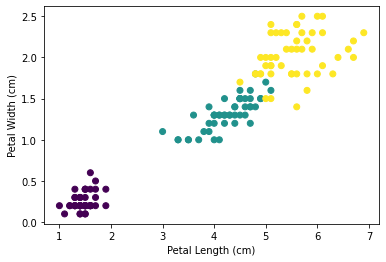

In [1132]:
plt.scatter(dta_iris.iloc[:,2],dta_iris.iloc[:,3],c=iris.target)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

In [1133]:
x=dta_iris.iloc[:,0:4]
print(x)
y=dta_iris.iloc[:,4]
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

# **Classification**

### ***KNN Algorithm***

In [1134]:
from sklearn.neighbors import KNeighborsClassifier

**Step 1- Train the model (FITTING)**

In [1135]:
knn=KNeighborsClassifier(n_neighbors=6 , metric='minkowski', p=1)
#p= 2 for euclidean and 1 for manhattan

**Step 2 - Define X and Y for preprocessing**

In [1136]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')

**Step 3- Start Prediction problem solving**

for example, someone imagine that someone gives you a sample that contains Sepal and Petals width and length, find the type of flower.

In [1137]:
x_new=np.array([[5.6,3.4,1.4,0.1]]) #Sample datasets
x_new2=np.array([[4.5,1.4,7.4,2.1]])

In [1138]:
knn.predict(x_new)

array([0])

Here it predicts the sample to be of Setosa

In [1139]:
knn.predict(x_new2) #

array([2])

Here it predicts the sample to be of Virginica

### ***KNN Algorithm With training and test set creation***

Step 1-Split dataset into training and test set

In [1140]:
from sklearn.model_selection import train_test_split

In [1141]:
x_train , x_test ,y_train, y_test =train_test_split(x,y,test_size=0.2, 
                                                    train_size=0.8, 
                                                    random_state=88, 
                                                    shuffle=True, stratify=y )
#random_state is just a code for your implementation, can beany no


In [1142]:
y_train

10     0
130    2
46     0
58     1
12     0
      ..
64     1
97     1
134    2
30     0
94     1
Name: label, Length: 120, dtype: int64

**Step 2- Continue processing the data and train**

In [1143]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=6 , metric='minkowski', p=1)
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')

**Step 3- Predict using test dataset and check with the existing output of the other test data**

In [1144]:
predicted_values=knn1.predict(x_test)
predicted_values

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

Now Compare the both data as to get output as same as Y_test

In [1145]:
y_test

92     1
66     1
128    2
126    2
50     1
106    2
74     1
111    2
84     1
20     0
78     1
107    2
143    2
102    2
109    2
24     0
71     1
43     0
42     0
32     0
113    2
5      0
120    2
37     0
34     0
61     1
88     1
15     0
86     1
33     0
Name: label, dtype: int64

**Step 4 - Find accuracy**

In [1146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_values)

0.9666666666666667

# **Naive Bayes**

### **Decision Trees**

**Step 1 - Import the descision tree classifier package from scikit learn**

In [1147]:
from sklearn.tree import DecisionTreeClassifier

In [1148]:
des_tree=DecisionTreeClassifier()

**Step 2- Fit the data**

In [1149]:
des_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1150]:
predicted_values_destree=des_tree.predict(x_test)
predicted_values_destree

array([1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

In [1151]:
accuracy_score(y_test,predicted_values_destree)

1.0

Step 1 import the package

In [1152]:
from sklearn.naive_bayes import GaussianNB

In [1153]:
nb= GaussianNB()

Step 2 - Fit the data

In [1154]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1155]:
predicted_values_nb=nb.predict(x_test)
predicted_values_nb

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

In [1156]:
y_test

92     1
66     1
128    2
126    2
50     1
106    2
74     1
111    2
84     1
20     0
78     1
107    2
143    2
102    2
109    2
24     0
71     1
43     0
42     0
32     0
113    2
5      0
120    2
37     0
34     0
61     1
88     1
15     0
86     1
33     0
Name: label, dtype: int64

In [1157]:
accuracy_score(y_test,predicted_values_nb)

0.9666666666666667

In [1158]:
from sklearn.model_selection import cross_val_score
score_nb=cross_val_score(nb, x, y,cv=10)
print(score_nb)

[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


**LOGISTIC REGRESSION**

Used mainly for binary classification eg. Mail spam or not spam.

**Step 1 - We import a different dataset**

In [1159]:
from sklearn.datasets import load_breast_cancer

In [1160]:
data_c= load_breast_cancer()
print(data_c)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [1161]:
data_c.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [1162]:
data_c_viz=pd.DataFrame(data_c.data,columns=data_c.feature_names)

In [1163]:
data_c_viz

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1164]:
x=data_c.data
y=data_c.target

In [1165]:
from sklearn.model_selection import train_test_split

In [1166]:
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x,y,test_size=0.3, train_size=0.7, random_state=88)

In [1167]:
from sklearn.linear_model import LogisticRegression

In [1168]:
lr=LogisticRegression()

In [1169]:
lr.fit(x_lr_train, y_lr_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1170]:
predicted_values_lr=lr.predict(x_lr_test)

In [1171]:
predicted_values_lr

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [1172]:
y_lr_test

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [1173]:
accuracy_score(y_lr_test,predicted_values_lr)

0.9473684210526315

### **Decision tree CROSS VALIDATION**

**Step1  -  Import the cross validation module from sklearn**

In [1174]:
from sklearn.model_selection import cross_val_score

**Step 2 - import the dataset**

In [1175]:
score_dt= cross_val_score(des_tree,x,y,cv = 10) #name of model, x and y as features and label, no of folds as CV

In [1176]:
score_dt

array([0.94736842, 0.89473684, 0.92982456, 0.87719298, 0.94736842,
       0.89473684, 0.89473684, 0.94736842, 0.92982456, 0.91071429])

### **Classification - Evaluation Metrics**

### **Confusion Matrix**

In [1177]:
from sklearn.metrics import confusion_matrix, classification_report

In [1178]:
conf_mat=confusion_matrix(y_lr_test,predicted_values_lr) #(y_true, y_pred)
class_rep=classification_report(y_lr_test, predicted_values_lr)

In [1179]:
conf_mat

array([[ 53,   4],
       [  5, 109]])

In [1180]:
class_rep

'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92        57\n           1       0.96      0.96      0.96       114\n\n    accuracy                           0.95       171\n   macro avg       0.94      0.94      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

In [1181]:
from sklearn.metrics import roc_curve

In [1182]:
y_lr_prob=lr.predict_proba(x_lr_test)

In [1183]:
y_lr_prob

array([[3.86996119e-04, 9.99613004e-01],
       [9.99999991e-01, 8.63786983e-09],
       [1.70434410e-03, 9.98295656e-01],
       [1.00000000e+00, 4.21499992e-11],
       [1.25649197e-03, 9.98743508e-01],
       [5.17992742e-03, 9.94820073e-01],
       [3.72327162e-01, 6.27672838e-01],
       [4.64315921e-03, 9.95356841e-01],
       [9.99999999e-01, 1.26126771e-09],
       [9.99999759e-01, 2.41375974e-07],
       [3.22136026e-03, 9.96778640e-01],
       [5.71783774e-02, 9.42821623e-01],
       [1.00000000e+00, 2.35410863e-11],
       [9.99999760e-01, 2.39991679e-07],
       [9.99925119e-01, 7.48813298e-05],
       [9.99869900e-01, 1.30099667e-04],
       [9.87678347e-01, 1.23216532e-02],
       [1.11923874e-03, 9.98880761e-01],
       [1.06202473e-03, 9.98937975e-01],
       [1.70557003e-04, 9.99829443e-01],
       [3.94875710e-04, 9.99605124e-01],
       [9.99467019e-01, 5.32981261e-04],
       [9.09748166e-01, 9.02518338e-02],
       [4.35946152e-02, 9.56405385e-01],
       [3.014255

In [1184]:
y_lr_prob=y_lr_prob[:,1]

In [1185]:
FPR, TPR, thresholds,= roc_curve(y_lr_test, y_lr_prob)

Text(0, 0.5, 'TPR')

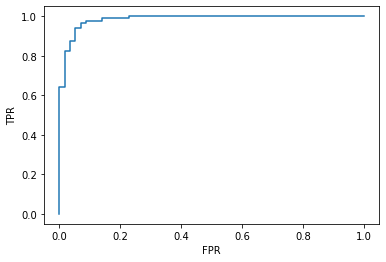

In [1186]:
plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [1187]:
from sklearn.metrics import roc_auc_score

In [1188]:
roc_auc_score(y_lr_test,y_lr_prob)

0.984610649430594

# **Regression**

## **Preprocessing data**

Step1 - Import dataset, numpy, pandas and matplotlib

In [1189]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2- Load dataset

In [1190]:
dat_bos=load_boston()
dat_bos_viz=pd.DataFrame(dat_bos.data,columns=dat_bos.feature_names)
print(dat_bos_viz.head(10))
dat_bos_viz.info()

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
5  0.02985   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.12   5.21
6  0.08829  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  395.60  12.43
7  0.14455  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  396.90  19.15
8  0.21124  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  386.63  29.93
9  0.17004  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  386.71  17.10

[10 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  

Step 3- Load dataset data and target values into x and y

In [1191]:
x=dat_bos.data
y=dat_bos.target

Step4- Split dataset into Training and Test data

In [1192]:
from sklearn.model_selection import train_test_split

In [1193]:
x_bos_train, x_bos_test, y_bos_train, y_bos_test = train_test_split(x,y, test_size=0.25, train_size=0.75, random_state=76) 

Step 5a -Normalize data for prediction calculation

In [1194]:
from sklearn.preprocessing import MinMaxScaler

In [1195]:
mmsc=MinMaxScaler(feature_range=(0,1))

In [1196]:
x_bos_train=mmsc.fit_transform(x_bos_train)
x_bos_test=mmsc.fit_transform(x_bos_test)

In [1197]:
x_bos_train

array([[5.14089134e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 2.17429890e-01, 1.00000000e+00],
       [2.91478404e-03, 0.00000000e+00, 3.38343109e-01, ...,
        7.02127660e-01, 1.00000000e+00, 3.50921986e-01],
       [6.77193849e-03, 2.00000000e-01, 1.28665689e-01, ...,
        4.25531915e-02, 9.81743496e-01, 9.61702128e-02],
       ...,
       [5.93926027e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.53040215e-01, 4.83120567e-01],
       [5.81113431e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.10921986e-01],
       [1.63464848e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 9.43024494e-01, 0.00000000e+00]])

Step 5b - Reshape y before training

In [1198]:
y_bos_train=y_bos_train.reshape(-1,1)

In [1199]:
y_bos_train=mmsc.fit_transform(y_bos_train)
y_bos_train

array([[0.04444444],
       [0.29555556],
       [1.        ],
       [0.59111111],
       [0.01333333],
       [0.32888889],
       [0.32      ],
       [0.51333333],
       [0.32      ],
       [0.05333333],
       [0.62666667],
       [0.26888889],
       [0.33333333],
       [0.55777778],
       [0.39111111],
       [0.60888889],
       [0.41333333],
       [0.62222222],
       [0.34222222],
       [0.65777778],
       [0.54222222],
       [0.61111111],
       [0.30888889],
       [0.28888889],
       [0.07777778],
       [0.        ],
       [0.19777778],
       [0.27777778],
       [0.34      ],
       [0.34      ],
       [0.22666667],
       [0.40444444],
       [0.38666667],
       [0.20222222],
       [0.62444444],
       [0.19555556],
       [0.41777778],
       [0.43111111],
       [0.35555556],
       [0.29555556],
       [0.55111111],
       [0.48888889],
       [0.55777778],
       [1.        ],
       [0.61555556],
       [0.22666667],
       [0.67555556],
       [0.202

## **Linear Regression**

### **Simple Linear Regression**

Step 1 - Import model LinearRegression

In [1200]:
from sklearn.linear_model import LinearRegression

Step 2 -Load and fit data

In [1201]:
lin_r=LinearRegression()

In [1202]:
lin_r.fit(x_bos_train,y_bos_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step 3- Start analyzing data for prediction

In [1203]:
predicted_values_mlr=lin_r.predict(x_bos_test)
predicted_values_mlr

array([[ 0.14327016],
       [ 0.30728044],
       [ 0.41978008],
       [ 0.59472732],
       [ 0.55995583],
       [ 0.50190144],
       [ 0.36589015],
       [ 0.44105588],
       [ 0.51042542],
       [ 0.28706374],
       [ 0.30793721],
       [ 0.21462711],
       [ 0.15673253],
       [ 0.41721547],
       [ 0.28842011],
       [ 0.4105379 ],
       [ 0.29845638],
       [ 0.00992905],
       [ 0.35233715],
       [ 0.32190852],
       [ 0.38272493],
       [ 0.56909258],
       [ 0.34583186],
       [ 0.31709011],
       [ 0.11586898],
       [ 0.55055255],
       [ 0.49389675],
       [ 0.6678577 ],
       [ 0.34401572],
       [ 0.42020137],
       [ 0.28962115],
       [ 0.31216023],
       [ 0.41909893],
       [ 0.40040973],
       [ 0.53239415],
       [ 0.39378046],
       [ 0.36557888],
       [ 0.32975378],
       [ 0.40594942],
       [ 0.35354142],
       [ 0.1851786 ],
       [ 0.32794278],
       [ 0.75514357],
       [ 0.44754725],
       [ 0.32994569],
       [ 0

Step 4 - Unonormalize or reverse the data back to its normal form to use it later on

In [1204]:
predicted_values_mlr=mmsc.inverse_transform(predicted_values_mlr)

In [1205]:
predicted_values_mlr

array([[11.44715732],
       [18.82761987],
       [23.89010363],
       [31.76272961],
       [30.19801252],
       [27.58556465],
       [21.46505689],
       [24.84751479],
       [27.96914381],
       [17.9178682 ],
       [18.85717423],
       [14.65822009],
       [12.05296391],
       [23.77469627],
       [17.97890485],
       [23.47420572],
       [18.43053729],
       [ 5.44680739],
       [20.85517162],
       [19.48588347],
       [22.22262166],
       [30.6091661 ],
       [20.5624339 ],
       [19.26905486],
       [10.21410416],
       [29.77486467],
       [27.2253539 ],
       [35.05359649],
       [20.48070721],
       [23.90906187],
       [18.03295166],
       [19.04721018],
       [23.85945188],
       [23.01843796],
       [28.95773689],
       [22.72012069],
       [21.45104939],
       [19.83891999],
       [23.26772399],
       [20.90936398],
       [13.33303691],
       [19.75742509],
       [38.98146084],
       [25.13962604],
       [19.84755589],
       [22

In [1206]:
y_bos_test

array([13.6, 27.1, 21.4, 28.4, 23. , 23.7, 21.5, 21.5, 23.7, 16. , 20. ,
       15.4, 10.5, 23. , 14.9, 21.2, 20.1,  8.5, 20.5, 18.6, 20.6, 24. ,
       21.7, 17.1, 12.7, 22.9, 23.2, 37.9, 19.3, 23. , 12.7, 18.5, 23.4,
       20.3, 28.4, 11.9, 20.1, 17.8, 20.2, 19.8, 17.2, 19.1, 44. , 22.9,
       20. , 17.4, 20.2, 24.8, 26.6, 20.1, 23.9, 23.5, 13.1, 20.9, 17.5,
       20.7, 28.7, 20.5, 20.9,  8.3, 19.6, 19.4, 25. , 17.2, 17.8, 25. ,
       23.4, 22.9, 11.8, 28.7, 26.5, 14.2, 27.5, 13.9, 31.1, 18.5, 15.7,
       23.3, 23.1, 29.9, 22.8, 22.3, 17.9, 43.1, 17.8, 24.3,  8.8, 38.7,
       16.7, 22.8, 24.5, 13.8, 43.5, 15.2, 23.9, 27.5, 33.4, 14.9, 19.7,
       21.7, 37.2, 28.2,  8.3, 13.4, 22.6, 17.3, 21. , 16.6, 14.8, 19.6,
       21.2, 22. , 19.7, 18.7,  9.7, 22.2, 23.1, 20.6, 18.9,  7.2, 21.7,
       19.9, 15. , 24.3, 31.7, 50. , 50. ])

**Evaluation Metrics**


1.   Mean Absolute Error(MAE)
2.   Mean Squared Method(MSM)
3.   Root Mean Square Error Method(RMSE)
4.   Mean Absolute Percentage Error(MAPE)



In [1207]:
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [1208]:
mae=mean_absolute_error(y_bos_test, predicted_values_mlr)
mae

2.939433362698197

In [1209]:
mse=mean_squared_error(y_bos_test, predicted_values_mlr)
mse

17.309236065228887

In [1210]:
rmse=math.sqrt(mse) #calculating root mean squared error using mse
rmse

4.160437004117343

In [1211]:
r2=r2_score(y_bos_test, predicted_values_mlr)
r2

0.6988343407769659

In [1212]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return (np.mean(np.abs((y_true-y_pred)/y_true))*100)

In [1213]:
mape=mean_absolute_percentage_error(y_bos_test, predicted_values_mlr)
mape

43.713152116475015

### **Polynomial Linear Regression**

In [1214]:
from sklearn.datasets import load_boston
new_bos=load_boston()

In [1215]:
x=new_bos.data[:,5]
y=new_bos.target

In [1216]:
x_bos_train, x_bos_test, y_bos_train, y_bos_test= train_test_split(x,y, test_size=0.2, train_size=0.8, random_state=76)

In [1217]:
from sklearn.preprocessing import PolynomialFeatures

In [1218]:
poly_p=PolynomialFeatures(degree=2)

In [1219]:
x_bos_train=x_bos_train.reshape(-1,1)

In [1220]:
poly_x=poly_p.fit_transform(x_bos_train)
poly_x

array([[ 1.      ,  5.349   , 28.611801],
       [ 1.      ,  6.749   , 45.549001],
       [ 1.      ,  6.333   , 40.106889],
       ...,
       [ 1.      ,  6.051   , 36.614601],
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  7.489   , 56.085121]])

In [1221]:
lin_r=LinearRegression()

In [1222]:
poly_lr=lin_r.fit(poly_x,y_bos_train)

In [1223]:
poly_lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1224]:
x_bos_test=x_bos_test.reshape(-1,1)
poly_xt=poly_p.fit_transform(x_bos_test)

In [1225]:
predicted_values_poly=poly_lr.predict(poly_xt)

In [1226]:
r2=r2_score(y_bos_test,predicted_values_poly)
r2

0.657015708640466

# **Random Forest Regression**

## **Random Forest Regression**

uses **Ensemble Learning** - Combination of several decision tree.

Depends on the type of data,
if
1. Continous Data - Regression
2. Discrete Data - Classification


Important parameters used in Random Forest- 

*   n_estimator = number of trees
*   List item




In [1227]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [1228]:
dat_bos=load_boston()
x=dat_bos.data
y=dat_bos.target

In [1229]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, test_size=0.25, random_state=76)

In [1230]:
sc=MinMaxScaler(feature_range=(0,1))
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
y_train=y_train.reshape(-1,1)
y_train=sc.fit_transform(y_train)

In [1231]:
random_f = RandomForestRegressor(n_estimators=10 ,random_state=33) #n_estimator is 100 by default if not entered 

In [1232]:
random_f.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [1233]:
predicted_values_rf=random_f.predict(x_test)
predicted_values_rf

array([0.20933333, 0.28266667, 0.37466667, 0.44977778, 0.404     ,
       0.444     , 0.31133333, 0.31244444, 0.664     , 0.33333333,
       0.356     , 0.23288889, 0.13355556, 0.45333333, 0.204     ,
       0.33488889, 0.38644444, 0.03444444, 0.30466667, 0.37088889,
       0.39711111, 0.54622222, 0.336     , 0.28311111, 0.21177778,
       0.43111111, 0.41333333, 0.63022222, 0.31777778, 0.40977778,
       0.17577778, 0.34333333, 0.39311111, 0.34444444, 0.47222222,
       0.39      , 0.32555556, 0.20888889, 0.424     , 0.31844444,
       0.29888889, 0.34866667, 0.86488889, 0.39888889, 0.36444444,
       0.372     , 0.32822222, 0.61466667, 0.586     , 0.33333333,
       0.39466667, 0.44644444, 0.25533333, 0.35822222, 0.338     ,
       0.42288889, 0.44733333, 0.35066667, 0.33222222, 0.13311111,
       0.34933333, 0.35266667, 0.632     , 0.176     , 0.31577778,
       0.46688889, 0.42533333, 0.32911111, 0.216     , 0.44577778,
       0.45066667, 0.28466667, 0.46888889, 0.27333333, 0.616  

In [1234]:
predicted_values_rf=predicted_values_rf.reshape(-1,1)
predicted_values_rf=sc.inverse_transform(predicted_values_rf)
predicted_values_rf

array([[14.42],
       [17.72],
       [21.86],
       [25.24],
       [23.18],
       [24.98],
       [19.01],
       [19.06],
       [34.88],
       [20.  ],
       [21.02],
       [15.48],
       [11.01],
       [25.4 ],
       [14.18],
       [20.07],
       [22.39],
       [ 6.55],
       [18.71],
       [21.69],
       [22.87],
       [29.58],
       [20.12],
       [17.74],
       [14.53],
       [24.4 ],
       [23.6 ],
       [33.36],
       [19.3 ],
       [23.44],
       [12.91],
       [20.45],
       [22.69],
       [20.5 ],
       [26.25],
       [22.55],
       [19.65],
       [14.4 ],
       [24.08],
       [19.33],
       [18.45],
       [20.69],
       [43.92],
       [22.95],
       [21.4 ],
       [21.74],
       [19.77],
       [32.66],
       [31.37],
       [20.  ],
       [22.76],
       [25.09],
       [16.49],
       [21.12],
       [20.21],
       [24.03],
       [25.13],
       [20.78],
       [19.95],
       [10.99],
       [20.72],
       [20.87],
       [

**Evaluation Metrics**

In [1235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf=mean_absolute_error(y_test, predicted_values_rf)
mse_rf=mean_squared_error(y_test, predicted_values_rf)
r2_rf=r2_score(y_test, predicted_values_rf)
mape_rf = mean_absolute_percentage_error(y_test, predicted_values_rf)

print( mae_rf, mse_rf, r2_rf, mape_rf)

2.388346456692913 11.528444094488187 0.7994150953601592 42.05365138529826


# **Support Vector Regression**

In [1236]:
from sklearn.svm import SVR

In [1237]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [1238]:
dat_bos=load_boston()
x=dat_bos.data
y=dat_bos.target

In [1239]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, test_size=0.25, random_state=76)

In [1240]:
sc=MinMaxScaler(feature_range=(0,1))
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
y_train=y_train.reshape(-1,1)
y_train=sc.fit_transform(y_train)

In [1241]:
reg_svr=SVR(kernel='rbf') #Default is rbf

In [1242]:
reg_svr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [1243]:
predicted_values_svr=reg_svr.predict(x_test)

In [1244]:
predicted_values_svr=predicted_values_svr.reshape(-1,1)
predicted_values_svr=sc.inverse_transform(predicted_values_svr)
predicted_values_svr

array([[14.24662499],
       [17.45458279],
       [22.15166285],
       [30.71124346],
       [27.90932297],
       [27.14906328],
       [22.20528399],
       [22.17381442],
       [29.31529709],
       [17.4288741 ],
       [18.50516684],
       [16.00789931],
       [10.14142804],
       [25.33238834],
       [15.16159783],
       [19.96197706],
       [21.09100787],
       [ 7.40282748],
       [23.25452187],
       [20.55578811],
       [24.12802719],
       [29.52324452],
       [19.946244  ],
       [17.12608595],
       [14.25606608],
       [26.90120474],
       [23.57813645],
       [36.17147376],
       [18.94423599],
       [25.76845812],
       [17.8769714 ],
       [17.08708114],
       [23.01227331],
       [24.78276881],
       [29.52411586],
       [21.09594967],
       [19.07741974],
       [23.74707661],
       [23.2836816 ],
       [19.84092652],
       [15.74149524],
       [20.30990938],
       [39.9526245 ],
       [22.28321765],
       [21.30408826],
       [21

In [1245]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_svr=mean_absolute_error(y_test, predicted_values_svr)
mse_svr=mean_squared_error(y_test, predicted_values_svr)
r2_svr=r2_score(y_test, predicted_values_svr)
mape_svr = mean_absolute_percentage_error(y_test, predicted_values_svr)

print( mae_svr, mse_svr, r2_svr, mape_svr)

2.6210345549212413 11.41716611522538 0.8013512354564292 42.40440288679086
